In [1]:
import numpy as np

In [2]:
print(np.random.binomial(1,0.5,1))

[1]


In [3]:
print(np.random.binomial(5,0.5,10))

[3 2 2 2 2 3 3 0 4 3]


- The first argument represents the number of trials - or how many coin flips we’re doing in each experiment
- The second argument represents  or the probability of “success”.
- The third argument represents how many experiments you’re running

## Building the Experiment

In [4]:
for i in range(10):
    print(np.random.binomial(1,0.5,1))

[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[1]


**OR**

In [5]:
print(np.random.binomial(1,0.5,10))

[1 0 1 1 1 1 0 0 0 0]


In [6]:
print(np.random.binomial(20,0.5,10))

[10  8 11  9 10 10  9  6 14 12]


## REPEATED BERNOULLI EXPERIMENTS

In [7]:
np.random.seed(seed=7)
print(np.random.binomial(5,0.5,20))

[1 3 2 3 5 3 3 1 2 2 3 3 2 1 2 4 2 2 4 0]


In [8]:
n_1000 = np.random.binomial(5,0.5,1000)
n_10000 = np.random.binomial(5,0.5,10000)
n_100000 = np.random.binomial(5,0.5,100000)

print(f"probability for 1000: {np.sum(n_1000==4)/1000}")
print(f"probability for 100000: {np.sum(n_10000==4)/10000}")
print(f"probability for 1000000: {np.sum(n_100000==4)/100000}")

probability for 1000: 0.164
probability for 100000: 0.1588
probability for 1000000: 0.15795


## VISUALIZING FLIPPING A COIN

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
np.random.seed(seed=7)

In [10]:
def bar_chart(flips):
    np.random.seed(seed=7)
    result = np.random.binomial(5,0.5,flips)
    fig = plt.figure()
    ax = plt.subplot(111)
    n,bins,patches = ax.hist(result, bins=np.arange(7)-0.5, rwidth=0.8, density=True)
    ax.set_xlabel('Number of Times Throwing Heads', size=16)
    ax.set_ylabel('Frequency', size=16)

In [11]:
interact(bar_chart, flips = [1,100,1000,10000,100000,1000000])

interactive(children=(Dropdown(description='flips', options=(1, 100, 1000, 10000, 100000, 1000000), value=1), …

<function __main__.bar_chart(flips)>

## Bernoulli experiments to model room bookings

In [12]:
def booking(amount):
    bookings = np.random.binomial(100,0.92,size=amount)
    length = len(np.unique(np.array(bookings)))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    n,bins,patches = ax.hist(bookings, bins = np.arange(81,101)-0.5, rwidth=0.9,density=True)
    ax.set_xlabel('Number of rooms booked', size=16)
    ax.set_ylabel('Frequency', size=16)
    ax.set_xticks(range(82,100))
    plt.show();

In [13]:
interact(booking, amount=[1,100,1000,10000,100000,1000000])

interactive(children=(Dropdown(description='amount', options=(1, 100, 1000, 10000, 100000, 1000000), value=1),…

<function __main__.booking(amount)>

## CALCULATING PROFIT ON ANY GIVEN NIGHT

In [14]:
def num_booked(booking):
    booking_num = np.array(np.random.binomial(booking,0.92,10000))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(booking_num, bins = np.arange(84,104)-0.5, rwidth=0.9, density=True)
    ax.set_xlabel('Number of rooms booked', size=16)
    ax.set_ylabel('Frequency', size=16)
    ax.set_xticks(range(85,booking))
    plt.show()

### 1) The Bernoulli Experiment when booking 104 rooms

In [15]:
interact(num_booked, booking = range(90,110))

interactive(children=(Dropdown(description='booking', options=(90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 10…

<function __main__.num_booked(booking)>

### 2) The Profit Distribution when booking 104 rooms

In [16]:
np.random.seed(seed=7)

booking_104 = np.random.binomial(104,0.92,10000)

booking_number = np.array(booking_104)

revenue = 200*booking_number
cost = 400*(booking_number-100)
cost_final = np.where(cost<0,0,cost)
profit = revenue - cost_final

print(profit)

[19800 18800 19200 ... 18600 19000 19600]


### 3) The Expected Profit

In [17]:
print(np.sum(profit)/10000)

19124.42


In [18]:
def num_booked(booking = 104):
    booking_num = np.array(np.random.binomial(booking,0.92,10000))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    bins = np.arange(booking_num.min(),booking_num.max())
    
    ax.hist(booking_num, bins = bins-0.5, rwidth=0.9,density = True)
    
    n, bins, patches = ax.hist(booking_num, bins = bins-0.5, rwidth=0.9, density = True) 
    ax.set_xlabel(f"Expected occupancy with {booking} rooms booked", size=16)
    ax.set_ylabel('Frequency', size=16)
    ax.set_xticks(range(85,booking))
    plt.show()
    
                  
    booking_rooms= np.array(np.random.binomial(n=booking, p=0.92, size=10000))
    booking_number = np.array(booking_rooms)
    revenue = 220 * booking_number
    cost = (booking_number - 100) * 400
    cost_final = np.where(cost<0, 0, cost) 
    profit = revenue - cost_final
    
                  
    fig = plt.figure()
    ax = fig.add_subplot(111)
    bins2 = np.arange(profit.min(), profit.max(),(round((profit.max() - profit.min())/18)))
   
    n, bins, patches = ax.hist(profit, bins = bins2,  rwidth=0.9, density = True) 
    ax.set_xlabel(f"Expected profit when booking {booking} rooms", size=16)
    ax.set_ylabel('Frequency', size=16)
    plt.show()

In [19]:
widget = interact(num_booked, booking=[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 
                                          104, 105, 106, 107, 108, 109])

interactive(children=(Dropdown(description='booking', index=14, options=(90, 91, 92, 93, 94, 95, 96, 97, 98, 9…

## Using Python to define Optimal numbers of rooms booked

Below you can see a simulation using a for loop to iterate through a number of rooms booked and conducting the bernouli experiment using each of the numbers in the range from 97 to 120. The results are then plotted on a graph for you to visualize the profit associated with each number of rooms booked. Below is the code in Python to accomplish this along with descriptions of what is happening in the code.

### Declaring Variables

In [20]:
revenue = 220*booking_104
cost = (booking_104-100)*400
cost_final = np.where(cost<0,0,cost)
profit = revenue-cost_final

First we determine the income we would recieve from each of experiments we performed. In this line of code, the result of each of the experiments is multiplied by the cost of each room, $220. We then store this in a variable called revenue.

`revenue = 220 * booking_104`

Next, we calculate the cost of placing a customer with another hotel if we don’t have a room available. In this case, for every room we book, over our occupancy, it costs us $400. we store this value in a variable called cost.

`cost = (booking_104 - 100) * 400`

Then we need to correct for negative cost. Here we use the .where() function from the numpy library. In our case we want the cost if it is positive, but if it is less than 0 we will use 0 so we don’t have a negative cost. We store this information in a variable called cost_final.

`cost_final = np.where(cost<0, 0, cost)`

Finally we are able to calculate our profit using these calculations by subtracting cost_final from revenue. We store this using the variable profit.

`profit = revenue - cost_final`

### Simulation multiple experiments

In the loop below, we use the above variables along with the code from the experiments we did before to perform the experiment for each number of rooms booked between 97 and 120 and store the profit from each in a list. The code for this is below.

In [22]:
n_experiments = 10000
rooms_in_loop = range(97,121)
all_profits = []

for r in rooms_in_loop:
    bookings = np.random.binomial(r,0.92,n_experiments)
    revenue = 220*bookings
    cost = (bookings-100)*400
    cost_final = np.where(cost<0,0,cost)
    profit = revenue-cost_final
    expected_profit = np.sum(profit)/n_experiments
    all_profits.append(expected_profit)

### Graphing the experimented results

Now that we have simulated 10,000 experiments for each number of overbookings, we can graph the resulting profits to see which will yield us the best profit. To do this we use a library in Python called matplotlib.pyplot which has been assigned to the common alias plt so we don’t have to type it all out everytime we want to use it. With the command below, we are able to generate a simple line plot so we can visualize the number of overbooked rooms and the profit associated with each. This gives us a quick way to see where the best number of rooms to overbook is.

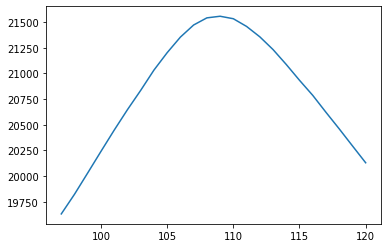

In [23]:
plt.plot(rooms_in_loop,all_profits);

### Conclusion

Is overbooking your hotel a wise decision or not? Hotels often face the problem of customers not showing up. In this course you learned how Python can be used to help make better business decisions. In Flatiron School’s Data Science Boot Camp, you can learn techniques such as these and how you can apply them to a business scenario.